In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, mean_absolute_error, \
                            mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

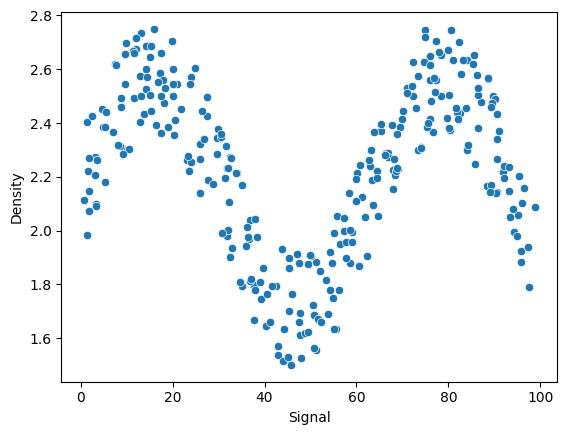

In [5]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [9]:
#Масштабирование не надо т.к. только один признак

In [6]:
X = df['Signal'].values.reshape(-1, 1) #Т.к. признак один, то необходимо привести его к двумерному массиву
y = df['Density']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
#Линейная регрессия

In [8]:
lr_model = LinearRegression()

In [9]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_predict = lr_model.predict(X_test)

In [13]:
mean_absolute_error(y_test, lr_predict)

np.float64(0.211198973318633)

In [14]:
np.sqrt(mean_squared_error(y_test, lr_predict))

np.float64(0.2570051996584629)

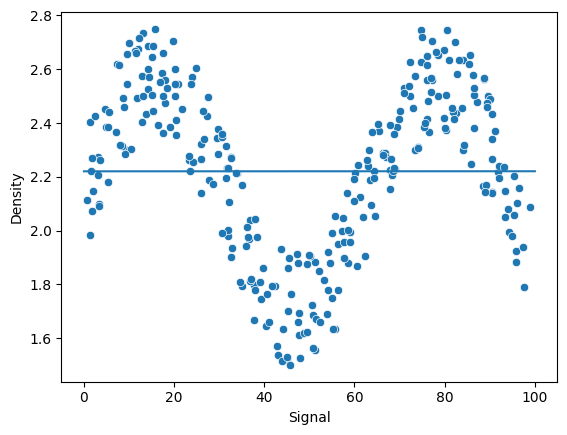

In [15]:
sns.scatterplot(x='Signal', y='Density', data=df)
plt.plot(np.linspace(0,100,30), lr_model.intercept_ + lr_model.coef_ * np.linspace(0,100,30))
#Линейная регрессия очень плохо предсказывает целевую функцию. Если бы было больше признаков, то можно было построить график остатков.

In [37]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    mae = mean_absolute_error(y_test, y_predict)
    print('MAE:', mae, 'RMSE:', rmse)
    sns.scatterplot(x='Signal', y='Density', data=df)

    kde_x = np.arange(0,100).reshape(-1, 1)
    kde_y = model.predict(kde_x)
    plt.plot(kde_x, kde_y, color='red')

MAE: 0.211198973318633 RMSE: 0.2570051996584629


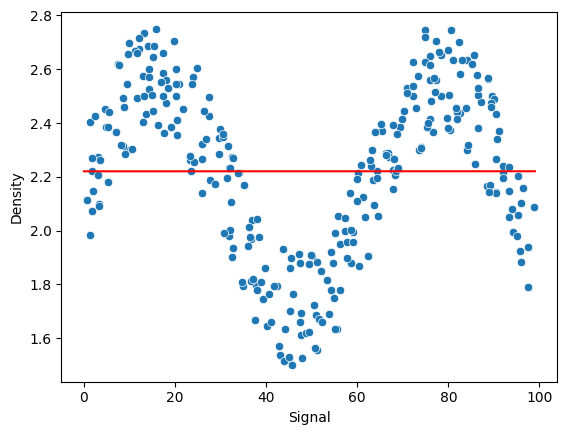

In [38]:
run_model(lr_model, X_train, y_train, X_test, y_test)

In [ ]:
#Полиномиальная регрессия

In [41]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969168049270058 RMSE: 0.13807520083403252


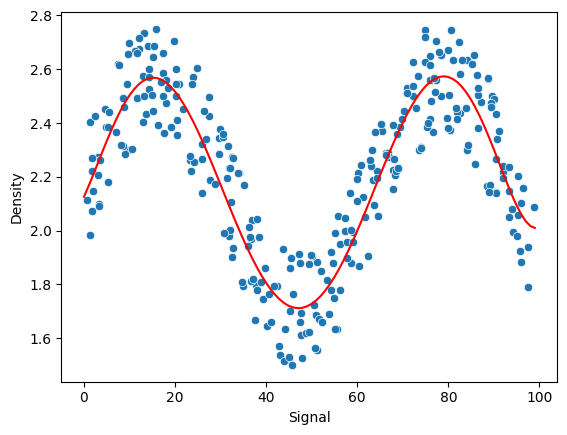

In [42]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [44]:
#Метод k-ближайших соседей

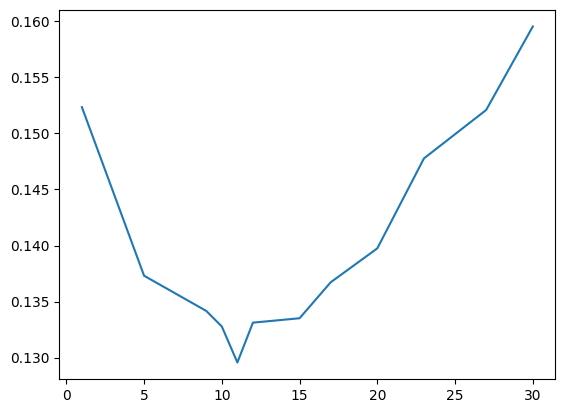

In [49]:
k_values = [1,5,9,10,11,12,15,17,20,23,27,30]
rmse = []
for k in k_values:
    model = KNeighborsRegressor(k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_predict)))
plt.plot(k_values, rmse)
#Оптимальный вариант k = 11

MAE: 0.1125383655251439 RMSE: 0.1295687462413451


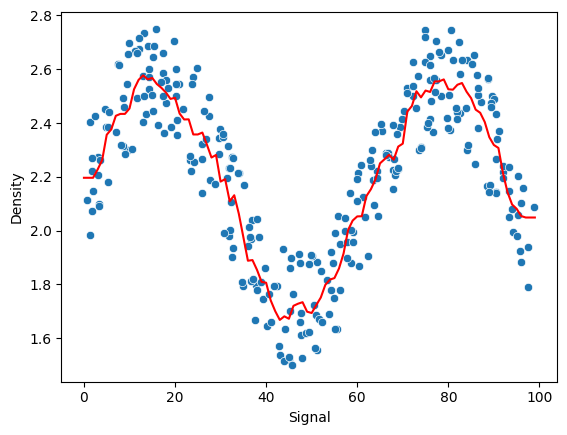

In [50]:
knn_model = KNeighborsRegressor(11)
run_model(knn_model, X_train, y_train, X_test, y_test)

In [52]:
#Деревья решений

In [53]:
tree_model = DecisionTreeRegressor()

MAE: 0.11877297474442378 RMSE: 0.1523487028635337


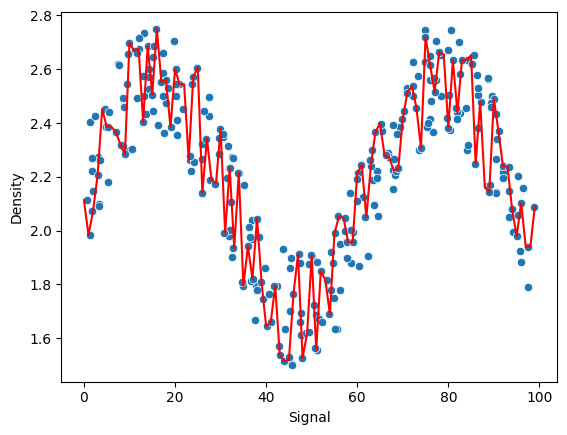

In [54]:
run_model(tree_model, X_train, y_train, X_test, y_test)

In [56]:
#Метод опорных векторов

In [61]:
svr_model = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma': ['scale', 'auto']}
grid = GridSearchCV(svr_model, param_grid)

MAE: 0.10854210121348368 RMSE: 0.12646999302046696


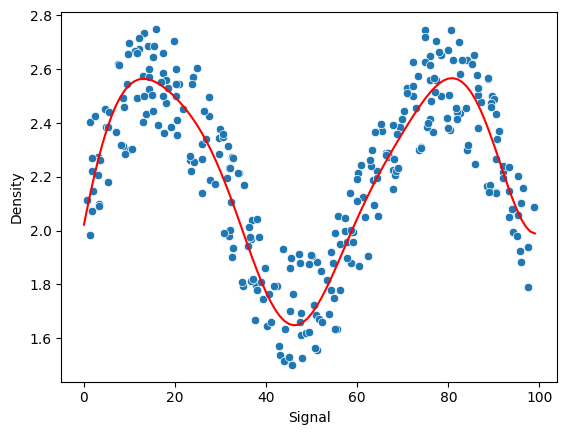

In [62]:
run_model(grid, X_train, y_train, X_test, y_test)

In [60]:
#Случайный лес

In [63]:
rfr_model = RandomForestRegressor(n_estimators=10)

MAE: 0.1107651541390548 RMSE: 0.13203460127203626


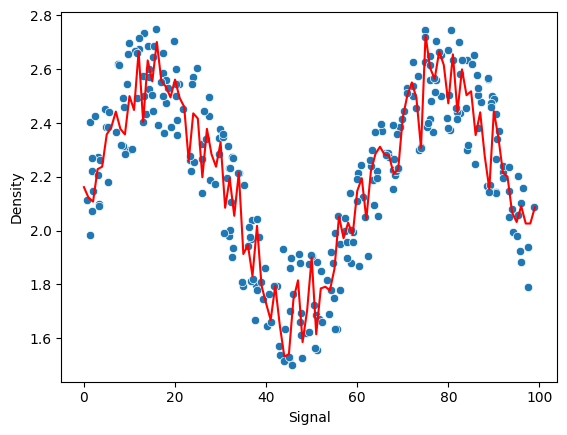

In [64]:
run_model(rfr_model, X_train, y_train, X_test, y_test)

In [65]:
#Расширяемые деревья

In [67]:
boost_model = GradientBoostingRegressor()

MAE: 0.11318284854800689 RMSE: 0.13294148649584667


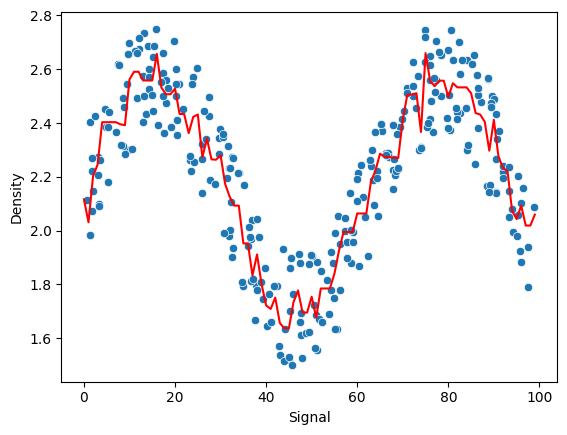

In [68]:
run_model(boost_model, X_train, y_train, X_test, y_test)

In [69]:
ada_model = AdaBoostRegressor()

MAE: 0.1185840609772372 RMSE: 0.1371620064232114


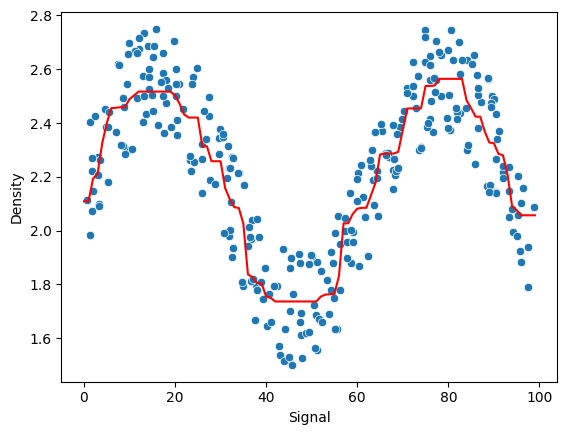

In [70]:
run_model(ada_model, X_train, y_train, X_test, y_test)